<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bulk-Data-Merit-Order" data-toc-modified-id="Bulk-Data-Merit-Order-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bulk Data Merit Order</a></span><ul class="toc-item"><li><span><a href="#List-of-Tenders-(Ausschreibung)" data-toc-modified-id="List-of-Tenders-(Ausschreibung)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>List of Tenders (Ausschreibung)</a></span></li><li><span><a href="#Result-of-Tenders-(Abgegebene-Angebote-/-Allocated-SRL)" data-toc-modified-id="Result-of-Tenders-(Abgegebene-Angebote-/-Allocated-SRL)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Result of Tenders (Abgegebene Angebote / Allocated SRL)</a></span><ul class="toc-item"><li><span><a href="#Supply/Demand-Curve-according-to-bids-and-asks-(According-to-Kahlen)" data-toc-modified-id="Supply/Demand-Curve-according-to-bids-and-asks-(According-to-Kahlen)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Supply/Demand Curve according to bids and asks (According to Kahlen)</a></span></li></ul></li><li><span><a href="#Activated-Control-Reserve-from-regelleistungen.net" data-toc-modified-id="Activated-Control-Reserve-from-regelleistungen.net-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Activated Control Reserve from regelleistungen.net</a></span><ul class="toc-item"><li><span><a href="#Calculate-15-min-Clearing-prices-by-looking-at-activated-reserve" data-toc-modified-id="Calculate-15-min-Clearing-prices-by-looking-at-activated-reserve-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Calculate 15-min Clearing prices by looking at activated reserve</a></span></li><li><span><a href="#Weekly-activated-secondary-control-reserve" data-toc-modified-id="Weekly-activated-secondary-control-reserve-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Weekly activated secondary control reserve</a></span></li></ul></li><li><span><a href="#Double-Check-Numbers" data-toc-modified-id="Double-Check-Numbers-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Double Check Numbers</a></span></li></ul></li><li><span><a href="#Calculate-Merit-order-for-each-Week" data-toc-modified-id="Calculate-Merit-order-for-each-Week-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calculate Merit order for each Week</a></span></li></ul></div>

In [325]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [326]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Bulk Data Merit Order

## List of Tenders (Ausschreibung)

In [327]:
df_tenders = pd.read_csv("../data/raw/balancing/tenders_2016_2017.csv", sep=';', index_col=False,
                     dayfirst=True, parse_dates=[0, 1, 2, 3,4], infer_datetime_format=True, decimal=',')
df_tenders = df_tenders[['DATE_FROM', 'DATE_TO', 'GATE_OPEN_TIME', 'GATE_COSURE_TIME', 'PRODUCT', 'TOTAL_DEMAND_[MW]']]
df_tenders.columns = ['from', 'to', 'gate_opening', 'gate_closure', 'product', 'demand_mw']
df_tenders.head(20)

,from,to,gate_opening,gate_closure,product,demand_mw
0,2015-12-28,2016-01-03,2015-12-18 12:00:00,2015-12-22 15:00:00,NEG_HT,2500
1,2015-12-28,2016-01-03,2015-12-18 12:00:00,2015-12-22 15:00:00,NEG_NT,2500
2,2015-12-28,2016-01-03,2015-12-18 12:00:00,2015-12-22 15:00:00,POS_HT,2500
3,2015-12-28,2016-01-03,2015-12-18 12:00:00,2015-12-22 15:00:00,POS_NT,2500
4,2016-01-04,2016-01-10,2015-12-23 12:00:00,2015-12-29 15:00:00,NEG_HT,1979
5,2016-01-04,2016-01-10,2015-12-23 12:00:00,2015-12-29 15:00:00,NEG_NT,1979
6,2016-01-04,2016-01-10,2015-12-23 12:00:00,2015-12-29 15:00:00,POS_HT,2054
7,2016-01-04,2016-01-10,2015-12-23 12:00:00,2015-12-29 15:00:00,POS_NT,2054
8,2016-01-11,2016-01-17,2015-12-30 12:00:00,2016-01-05 15:00:00,NEG_HT,1979
9,2016-01-11,2016-01-17,2015-12-30 12:00:00,2016-01-05 15:00:00,NEG_NT,1979


## Result of Tenders (Abgegebene Angebote / Allocated SRL)

Double checked with e.g. 
- https://www.smard.de/blueprint/servlet/page/home/marktdaten/78?marketDataAttributes=%7B%22resolution%22:%22week%22,%22region%22:%22DE%22,%22from%22:1509490800000,%22to%22:1512945900000,%22moduleIds%22:%5B18000422,18000423%5D,%22selectedCategory%22:null,%22activeChart%22:true,%22language%22:%22de%22%7D#chart-legend

**Caution: When aggregating take into account not to sum up HT and NT!**

In [328]:
df_results = pd.read_csv("../data/raw/balancing/results_2016_2017.csv", sep=';', index_col=False,
                     dayfirst=True, parse_dates=[0, 1], infer_datetime_format=True, decimal=',')

df_results.drop(['TYPE_OF_RESERVES', 'COUNTRY'], inplace=True, axis=1)
df_results.columns = ['from', 'to', 'product', 'capacity_price_mw','energy_price_mwh', 'payment_direction', 'offered_mw', 'allocated_mw']

df_results = pd.concat([df_results, pd.DataFrame(df_results["product"].str.split('_',1).tolist(),
                                   columns = ['product_type','product_time'])], axis = 1)

df_results.drop('product', axis=1, inplace=True)

df_results

,from,to,capacity_price_mw,energy_price_mwh,payment_direction,offered_mw,allocated_mw,product_type,product_time
0,2015-12-28,2016-01-03,589.00,500.000,GRID_TO_PROVIDER,5,5,NEG,HT
1,2015-12-28,2016-01-03,689.00,5999.000,GRID_TO_PROVIDER,5,5,NEG,HT
2,2015-12-28,2016-01-03,645.00,400.000,GRID_TO_PROVIDER,5,5,NEG,HT
3,2015-12-28,2016-01-03,645.00,400.000,GRID_TO_PROVIDER,5,5,NEG,HT
4,2015-12-28,2016-01-03,565.00,4440.000,GRID_TO_PROVIDER,8,8,NEG,HT
5,2015-12-28,2016-01-03,580.00,4440.000,GRID_TO_PROVIDER,8,8,NEG,HT
6,2015-12-28,2016-01-03,635.00,4440.000,GRID_TO_PROVIDER,6,6,NEG,HT
7,2015-12-28,2016-01-03,580.00,4440.000,GRID_TO_PROVIDER,8,8,NEG,HT
8,2015-12-28,2016-01-03,580.00,4440.000,GRID_TO_PROVIDER,5,5,NEG,HT
9,2015-12-28,2016-01-03,440.00,1500.000,GRID_TO_PROVIDER,9,9,NEG,HT


In [329]:
# Check for negative payment direction in positive control reserve
df_results.loc[df_results["product_type"] == "POS"]["payment_direction"].unique()

array(['GRID_TO_PROVIDER'], dtype=object)

In [330]:
# Make energy prices negative where provider has to pay for energy
df_results.loc[df_results['payment_direction'] == 'PROVIDER_TO_GRID',['energy_price_mwh']] = df_results['energy_price_mwh'] * (-1)
df_results.drop(["payment_direction"], axis=1, inplace=True)
df_results = df_results.sort_values(['from', 'product_type', 'product_time', 'energy_price_mwh'])

In [331]:
print(df_results.size)
df_results.head(10)

410936


,from,to,capacity_price_mw,energy_price_mwh,offered_mw,allocated_mw,product_type,product_time
123,2015-12-28,2016-01-03,633.0,-1.0,5,5,NEG,HT
106,2015-12-28,2016-01-03,504.0,0.5,10,10,NEG,HT
126,2015-12-28,2016-01-03,643.0,4.0,12,12,NEG,HT
107,2015-12-28,2016-01-03,520.0,5.9,10,10,NEG,HT
110,2015-12-28,2016-01-03,567.0,5.9,20,20,NEG,HT
111,2015-12-28,2016-01-03,583.0,5.9,20,20,NEG,HT
113,2015-12-28,2016-01-03,615.0,5.9,20,20,NEG,HT
10,2015-12-28,2016-01-03,499.0,6.5,10,10,NEG,HT
112,2015-12-28,2016-01-03,599.0,7.5,20,20,NEG,HT
127,2015-12-28,2016-01-03,653.0,8.0,12,12,NEG,HT


### Supply/Demand Curve according to bids and asks (According to Kahlen)

**Kahlen:** _The data for Stuttgart contains the individual bids and asks with the respective quantities and prices for each 15-minute time interval. From these bids and asks we form the demand and supply curves. The clearing point Q∗ sets the equilibrium, which determines whether the energy market operator settles the asks and bids placed by FleetPower (if the price P from the model is below the market price_ (P.71, Diss)

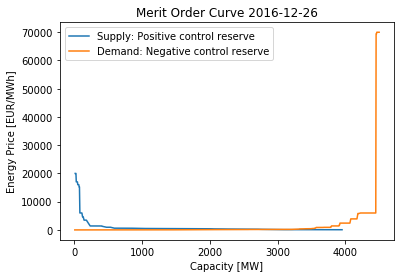

Clearing Price: 143.0 EUR/MWh


In [332]:
time = "HT"
day = "2016-12-26"
df_plot = df_results.loc[(df_results["product_time"] == time) & (df_results["from"] == day)]

df_supply = df_plot.loc[df_plot["product_type"] == "POS"].sort_values(["energy_price_mwh"], ascending=False).copy()
df_supply["cum_capacity_mw"] = df_supply["allocated_mw"].cumsum()
df_supply.reset_index()

df_demand = df_plot.loc[df_plot["product_type"] == "NEG"].sort_values(["energy_price_mwh"]).copy()
df_demand["cum_capacity_mw"] = df_demand["allocated_mw"].cumsum()
df_demand.reset_index

fig, ax = plt.subplots()
plt.plot(df_supply.cum_capacity_mw, df_supply.energy_price_mwh, label='Supply: Positive control reserve')
plt.plot(df_demand.cum_capacity_mw, df_demand.energy_price_mwh, label='Demand: Negative control reserve')
ax.set_xlabel("Capacity [MW]")
ax.set_ylabel("Energy Price [EUR/MWh]")
plt.title('Merit Order Curve %s' % day)
plt.legend();
plt.show()


df_cp = pd.concat([df_supply, df_demand]).sort_values("cum_capacity_mw").reset_index()
ask = float("inf")
bid = 0
for price in df_cp.itertuples():
    if price.product_type == "POS":
        ask = price.energy_price_mwh
    else:
        bid = price.energy_price_mwh
    
    if bid > ask:
        print('Clearing Price: %s EUR/MWh' % bid)
        break;

 **This is not an Auction where participants place bids & ask, the system operator plays the other part. Also not in 15min slots, how to get clearing price??**

## Activated Control Reserve from regelleistungen.net

In [302]:
df_activated = pd.read_csv("../data/raw/balancing/activated_secondary_reserve_2016_2017.csv", sep=';', decimal=',', thousands='.', index_col=false, dayfirst=true, parse_dates=[0], infer_datetime_format=true)
df_activated.drop(['LETZTE AENDERUNG', 'ERSATZWERT','LETZTE AENDERUNG.1', 'QUAL. NEG', 'QUAL. POS'], axis=1, inplace=True)
df_activated.columns = ['date', 'from', 'to', 'neg_mw', 'pos_mw']
hours_minutes_from = df_activated['from'].str.split(":", expand=True)
df_activated['from'] = pd.to_datetime(df_activated['date'].astype(str) + " " + hours_minutes_from[0] + ":" + hours_minutes_from[1])

hours_minutes_to = df_activated['to'].str.split(":", expand=True)
df_activated['to'] = pd.to_datetime(df_activated['date'].astype(str) + " " + hours_minutes_to[0] + ":" + hours_minutes_to[1])

# Fix time where 0:00 belongs to previous day
df_activated.loc[(df_activated['to'].dt.hour == 0) & (df_activated['to'].dt.minute == 0), 'to'] = df_activated.to + pd.DateOffset(days=1)

df_activated.drop('date', inplace=True, axis=1)
df_activated

,from,to,neg_mw,pos_mw
0,2016-01-01 00:00:00,2016-01-01 00:15:00,410.975,2.539
1,2016-01-01 00:15:00,2016-01-01 00:30:00,55.032,22.449
2,2016-01-01 00:30:00,2016-01-01 00:45:00,4.382,253.844
3,2016-01-01 00:45:00,2016-01-01 01:00:00,10.581,71.016
4,2016-01-01 01:00:00,2016-01-01 01:15:00,14.533,104.270
5,2016-01-01 01:15:00,2016-01-01 01:30:00,13.878,72.554
6,2016-01-01 01:30:00,2016-01-01 01:45:00,27.014,17.797
7,2016-01-01 01:45:00,2016-01-01 02:00:00,53.210,5.589
8,2016-01-01 02:00:00,2016-01-01 02:15:00,3.614,285.523
9,2016-01-01 02:15:00,2016-01-01 02:30:00,11.799,75.228


### Calculate 15-min Clearing prices by looking at activated reserve

In [334]:
# Calculate cumulative sums of every timeslot for every product
days = df_results["from"].unique()
types = df_results["product_type"].unique()
times = df_results["product_time"].unique()

cumsums = list()
for d in days:
    for typ in types:
        for t in times:
            cs = df_results.loc[(df_results["from"] == d)
                                & (df_results["product_type"] == typ)
                                & (df_results["product_time"] == t), ["allocated_mw"]].cumsum()
            cumsums.append(cs)

df_results["cumsum_allocated_mw"] = pd.concat(cumsums)

In [351]:
%%time
clearing_prices = list()

for t in df_activated.iloc[0:20, ].itertuples():
    day = pd.to_datetime(t[1])
    # Find out product time
    product_time = "HT" if 8 <= day.hour < 20 else "NT"
    # We are only interested in negative control reserve clearing prices
    product_type = "NEG"
    
    cp = df_results.loc[(df_results["to"] >= pd.Timestamp(day.date()))
                        & (df_results["from"] <= pd.Timestamp(day.date()))
                        & (df_results["product_time"] == product_time)
                        & (df_results["product_type"] == product_type)
                        & (df_results["cumsum_allocated_mw"] >= t.neg_mw)
                       ].iloc[0]["energy_price_mwh"]
    print('Capacity: %s - Price: %s' % (t.neg_mw, cp))
#    print(cp.loc[cp.cumsum_allocated_mw >= t.neg_mw].iloc[0])
    #clearing_prices.append(cp)

# print(clearing_prices)
#df_activated["clearing_prices"] = clearing_prices

Capacity: 410.975 - Price: 96.0
Capacity: 55.032 - Price: 25.0
Capacity: 4.382 - Price: 2.5
Capacity: 10.581 - Price: 13.0
Capacity: 14.533 - Price: 13.0
Capacity: 13.878 - Price: 13.0
Capacity: 27.014 - Price: 25.0
Capacity: 53.21 - Price: 25.0
Capacity: 3.614 - Price: 2.5
Capacity: 11.799000000000001 - Price: 13.0
Capacity: 28.023000000000003 - Price: 25.0
Capacity: 17.601 - Price: 16.6
Capacity: 1.3330000000000002 - Price: 2.5
Capacity: 1.324 - Price: 2.5
Capacity: 13.802 - Price: 13.0
Capacity: 19.922 - Price: 16.6
Capacity: 27.866 - Price: 25.0
Capacity: 46.788000000000004 - Price: 25.0
Capacity: 31.213 - Price: 25.0
Capacity: 9.642999999999999 - Price: 13.0
CPU times: user 306 ms, sys: 64 µs, total: 306 ms
Wall time: 302 ms


2016-01-26 00:00:00 NT


,from,to,capacity_price_mw,energy_price_mwh,offered_mw,allocated_mw,product_type,product_time
1929,2016-01-25,2016-01-31,31.00,5999.97,10,10,NEG,NT
1930,2016-01-25,2016-01-31,31.08,5999.97,10,10,NEG,NT
1931,2016-01-25,2016-01-31,31.16,5999.97,10,10,NEG,NT
1932,2016-01-25,2016-01-31,31.24,5999.97,10,10,NEG,NT
1933,2016-01-25,2016-01-31,31.32,5999.97,10,10,NEG,NT
1934,2016-01-25,2016-01-31,31.40,5999.97,10,10,NEG,NT
1935,2016-01-25,2016-01-31,31.48,5999.97,9,9,NEG,NT
1936,2016-01-25,2016-01-31,31.50,749.00,5,5,NEG,NT
1937,2016-01-25,2016-01-31,31.58,5999.97,7,7,NEG,NT
1938,2016-01-25,2016-01-31,31.50,749.00,5,5,NEG,NT


__Q: Divide by 4 to get quarterly MwH?__

### Weekly activated secondary control reserve

In [270]:
df_activated.groupby(df_activated.index // (4 * 24 * 7)).sum().head(10)

,neg_mw,pos_mw
0,41404.898,130699.506
1,61202.654,72034.660
2,20152.138,175991.396
3,80161.123,105599.075
4,98080.056,70770.262
5,130345.232,62266.814
6,54327.010,83859.728
7,69400.250,103195.962
8,52761.548,92910.436
9,46134.927,94576.429


## Double Check Numbers

_"Laut Monitoring-Bericht 2017 der Bundesnetzagentur betrug im Jahr 2016 die abgerufene Energiemenge in der negativen Sekundärreserve (SRL) 0,7 TWh sowie 1,4 TWh für die positive SRL"_

-- https://www.next-kraftwerke.de/wissen/regelenergie

-- https://www.smard.de/blueprint/servlet/page/home/marktdaten/78?marketDataAttributes=%7B%22resolution%22:%22year%22,%22region%22:%22DE%22,%22from%22:1451602800000,%22to%22:1514846700000,%22moduleIds%22:%5B18000427,18000426%5D,%22selectedCategory%22:18,%22activeChart%22:true,%22language%22:%22de%22%7D#chart-legend

Also shows this

In [50]:
allocated_neg_2016 = df_results.loc[(df_results["from"] < datetime(2017, 1, 1)) &
                                    (df_results["product"] == "NEG_NT")].allocated_mw.sum()
allocated_pos_2016 = df_results.loc[(df_results["from"] < datetime(2017, 1, 1)) &
                                    (df_results["product"] == "POS_NT")].allocated_mw.sum()
print('Allocated Control Reserve 2016 - Negative : %.2f TW Positive %.2f TW' %
      (allocated_neg_2016 / 1000000, allocated_pos_2016 / 1000000))

Allocated Control Reserve 2016 - Negative : 0.11 TW Positive 0.11 TW


In [45]:
activated_neg_2016 = df_activated[df_activated["from"] < datetime(
    2017, 1, 1)].neg_mw.sum()
activated_pos_2016 = df_activated[df_activated["from"] < datetime(
    2017, 1, 1)].pos_mw.sum()
print('Activated Control Reserve 2016 - Negative : %.2f TW Positive %.2f TW' %
      (activated_neg_2016 / 1000000, activated_pos_2016 / 1000000))

Activated Control Reserve 2016 - Negative : 2.84 TW Positive 5.64 TW


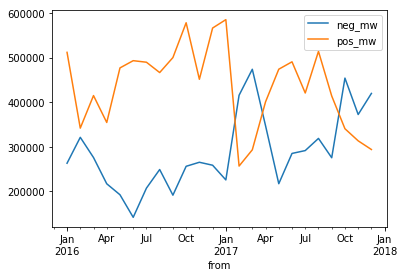

In [44]:
df_activated.set_index("from").groupby(pd.Grouper(freq='M')).sum().plot()

# Calculate Merit order for each Week

In [239]:
# Use index and then resample
# https://stackoverflow.com/questions/29706740/grouping-pandas-data-frame-by-time-intervals